In [1]:
# Overall File
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import csv
from scipy.stats import multivariate_normal

# define data paths
file1 = './../data/41467_2024_46346_MOESM4_ESM.csv'
file2 = './../data/41467_2024_46346_MOESM7_ESM.csv'

# read chemical data and merge it with only the overall score
chemData = pd.read_csv(file1)
dataWithOverall = pd.read_csv(file2)
overallAndId = dataWithOverall[['beer','overall']]

# now merge and remove duplicates
merged_df = chemData.merge(overallAndId, on = ['beer'], how='inner')

# Convert string in tasting_category_fine using factorize
merged_df['tasting_category_fine'], category_mapping = pd.factorize(merged_df['tasting_category_fine'])

# Remove NAs
na_counts_per_column = merged_df.isna().sum()
na_counts_per_column = na_counts_per_column[na_counts_per_column > 0]
threshold = 30

# Filter to show only columns with NA counts greater than the threshold
columns_to_drop = na_counts_per_column[na_counts_per_column > threshold].index

# Drop the columns with NA counts greater than the threshold
merged_df_withoutNa = merged_df.drop(columns=columns_to_drop)
merged_df_withoutNa = merged_df_withoutNa.fillna(0)

# drop all 4 SUM columns since we are only interested in the chems themselves
df = merged_df_withoutNa[merged_df_withoutNa.columns.drop(list(merged_df_withoutNa.filter(regex='_sum')))]
df.head(10)

,beer,beer_id,tasting_category_fine,acetaldehyde,CS2,DES,DMS,ethyl_2.methyl_butyrate,ethyl_acetate,ethyl_decanoate,...,Z.Z.geranyl.linalool,ethyl.hexadecanoate,manool.oxide,X13.epi.manool.oxide,isopropyl.hexadecanoate,manool,ethyl.octadecanoate,ethyl.pentanoate,X2.ethyl.3.methylpyrazine,overall
0,10,5410228202929,0,-0.641741,-2.146292,-1.905267,0.046211,-3.195520,-0.599350,-1.975309,...,-1.817819,-1.817819,3.702195,4.360243,-1.817819,5.721204,4.438951,0.014728,0.054353,-0.467852
1,86,5410783031019,0,-0.174824,-2.146292,-0.257098,0.347241,-3.195520,-0.507254,-1.755970,...,3.576605,-1.817819,4.133651,4.512589,4.323292,5.810501,4.247826,0.023167,0.001400,-0.994806
2,2,5410228142003,0,0.511067,-2.146292,-1.905267,0.898604,-3.195520,-0.134514,-1.893639,...,-1.817819,-1.817819,3.966730,4.394267,-1.817819,5.585529,3.598293,0.017571,0.000699,-1.528544
3,83,54055520,0,0.249793,-2.146292,-1.905267,0.782126,-3.195520,-0.233874,-2.086981,...,-1.817819,-1.817819,3.812901,4.174304,4.088807,5.204583,4.498781,0.016959,0.001101,-0.934138
4,40,5410228141181,0,-1.902829,-0.756987,-1.347270,0.553356,-3.195520,0.207751,-1.713095,...,-1.817819,6.484789,1.618481,4.742899,4.651536,6.515499,4.789220,0.117921,0.000492,-1.735965
5,247,5411081000264,1,0.404802,-2.146292,-1.905267,2.108738,-2.850781,0.659248,-2.161466,...,3.552430,-1.817819,3.905719,-1.817819,4.323532,5.908192,5.322008,0.023274,0.049058,-0.800698
6,48,8711406995211,2,0.891771,-2.146292,0.028093,1.399666,-2.512155,1.577115,-0.704521,...,5.252547,6.207206,4.051992,3.271554,4.647266,5.923461,5.228784,0.017974,0.009970,-0.259324
7,165,5411081000363,1,-0.243322,-2.146292,-0.556487,0.819550,-2.367037,0.465608,-2.674690,...,4.268160,-1.817819,4.048183,-1.817819,4.693955,5.858582,5.262941,0.022817,0.071466,-0.250890
8,124,5412186002658,3,0.087730,-2.146292,-0.336360,1.155214,-3.195520,0.949666,-1.944622,...,3.016781,5.598731,2.101812,4.129525,-1.817819,5.889627,-1.817819,0.034472,0.001180,0.230788
9,207,5411223030036,1,0.567943,-2.146292,-0.521224,1.085299,-0.539583,0.786460,-2.195861,...,3.853942,-1.817819,4.059355,-1.817819,4.724163,6.081144,4.399498,0.021659,0.513474,-0.677687


In [2]:
def display_column_names(dataframe):
    """
    Display all column names of the DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The input DataFrame.
    """
    column_names = dataframe.columns
    print("Column names:")
    for col in column_names:
        print(col)



display_column_names(df)
df.to_csv('./../data/result/combinedData.csv', index=False)

Column names:
beer
beer_id
tasting_category_fine
acetaldehyde
CS2
DES
DMS
ethyl_2.methyl_butyrate
ethyl_acetate
ethyl_decanoate
ethyl_hexanoate
ethyl_isovalerate
ethyl_octanoate
ethyl_propionate
H2S
isoamyl_alcohol
isobutanol
isobutyl_acetate
isopentyl_acetate
MeSH
octyl_acetate
phenethyl_acetate
phenethyl_alcohol
X4VG
SO2.mg.L.
acetic_acid.g.L.
ammonia.mg.L.
color.EBC.
betaglucan.mg.L.
lactic_acid.mg.L.
glycerol
iron
pH
protein.g.L.
bitterness
GFS
ethanol..v.v.
CO2.PSI.
unfermentables
kcalperc
X1.propanol
X2.3.butanedione
X3.methylbutanal
propylene.glycol
propyl.acetate
n.pentanol
X2.methyl.1.butanol
isopentyl.formate
ethyl.isobutyrate
X3.methyl.2.butenal
X2.methyltetrahydrofuran.3.one
ethyl.butyrate
butyl.acetate
methylpyrazine
furfural
ethyl.lactate
X3Z.hexenol
n.hexanol
styrene
X2.furanmethanol
X3.methyl.2.hexanol
X3.furanmethanol
X2.acetylfuran
X2.6.dimethyl.pyrazine
amyl.acetate
ethyl.tiglate
benzaldehyde
X5.methylfurfural
n.heptanol
X1.octen.3.ol
X3.methylthio.propanol
isomaltol

In [46]:
def generate_samples_with_bad(dataframe, n_samples, bad_columns, cat_columns, percentile=10):
    sampled_data = {}
    
    # Determine numeric columns
    num_cols = dataframe.select_dtypes(include=['number']).columns
    
    # Sample values for each column
    for col in dataframe.columns:
        if col in cat_columns:
            unique_values = dataframe[col].dropna().unique()
            if unique_values.any():
                sampled_data[col] = np.random.choice(unique_values, size=n_samples)
            else:
                sampled_data[col] = [np.nan] * n_samples
        elif col in num_cols:
            col_data = dataframe[col].dropna()
            mu, sigma = stats.norm.fit(col_data)
            if col in bad_columns:
                threshold = np.percentile(col_data, percentile)
                left_tail = col_data[col_data <= threshold]
                sampled_data[col] = np.random.choice(left_tail, size=n_samples, replace=True)
            else:
                samples = stats.norm(loc=mu, scale=sigma).rvs(size=n_samples)
                # Filter out -inf and inf values
                samples = samples[np.isfinite(samples)]
                # Ensure enough samples are drawn
                while len(samples) < n_samples:
                    additional_samples = stats.norm(loc=mu, scale=sigma).rvs(size=(n_samples - len(samples)))
                    additional_samples = additional_samples[np.isfinite(additional_samples)]
                    samples = np.concatenate((samples, additional_samples))
                sampled_data[col] = samples[:n_samples]
        else:
            raise ValueError(f"Column {col} is neither in categorical nor in numerical columns.")

    return pd.DataFrame(sampled_data)

In [47]:
min_values = df.min()
max_values = df.max()
avg_values = df.mean()

print(min_values['ethyl_acetate'])
print(max_values['ethyl_acetate'])
print(avg_values['ethyl_acetate'])

-0.599349782
2.116964264
1.389745029304


In [6]:
# Remove Beer/Beer_Id/tasting_category and overall from newly generated sample
# Why tasting category? If we don't remove it we get in trouble because we would have a dependency between ethanol and alcohol free beers
# since the category itself is determined by chemical properties we are fine with omiting it from the result
#rand_df = df.drop(columns=['beer','beer_id','overall'])
rand_df = df.drop(columns=['beer','beer_id']) # keep overall and sample it randomly
# Use name of columns that perform best in our GP analysis, start with what paper people found
rand_sample = generate_samples_with_bad(rand_df, 500, bad_columns=['ethyl_acetate','ethanol..v.v.', 'ethyl_octanoate','ethyl.phenylacetate','protein.g.L.', 'lactic_acid.mg.L.'],cat_columns=['tasting_category_fine'],percentile=20)
rand_sample.head(10)

,tasting_category_fine,acetaldehyde,CS2,DES,DMS,ethyl_2.methyl_butyrate,ethyl_acetate,ethyl_decanoate,ethyl_hexanoate,ethyl_isovalerate,...,Z.Z.geranyl.linalool,ethyl.hexadecanoate,manool.oxide,X13.epi.manool.oxide,isopropyl.hexadecanoate,manool,ethyl.octadecanoate,ethyl.pentanoate,X2.ethyl.3.methylpyrazine,overall
0,16,0.722213,-1.140722,-0.365495,1.310433,-2.866087,-0.507254,-0.591660,-0.303075,-2.315218,...,7.387656,2.949240,4.063587,1.824155,-3.091868,1.515465,3.078564,0.316734,-0.012001,0.822095
1,21,0.861341,-1.926163,0.525214,1.417517,-2.226091,1.221294,-1.860370,-1.022634,-2.073731,...,4.083409,7.021684,2.701844,4.755926,-1.084010,3.232538,6.368770,0.009646,0.067870,-0.630994
2,13,0.112324,-1.633154,-1.289044,1.092319,-1.690283,-0.507254,-1.522927,-0.155007,-3.190821,...,6.486116,11.177317,3.536849,4.513579,3.765592,5.069196,1.416722,-0.223018,0.173439,-0.776837
3,21,0.513117,-2.030728,0.715995,1.856735,-2.987727,0.953613,-1.280051,-0.321324,-3.923787,...,2.224260,0.168286,2.727796,4.169332,5.585498,2.276128,3.331638,-0.143800,-0.091466,0.059913
4,12,0.785899,-1.278914,0.281000,1.323651,-2.350005,1.192901,-1.413279,-0.464856,-4.975825,...,6.251346,2.985420,2.918185,2.869691,4.292330,5.814951,6.876369,0.068592,-0.157809,-0.141470
5,14,0.379495,-1.851272,-0.077873,1.368710,-2.287925,1.100355,-1.343618,-0.885067,-2.164759,...,3.290278,3.778939,3.870504,3.886390,0.009409,6.975137,5.172472,0.060691,0.042305,0.249294
6,16,0.745170,-2.025502,-0.130463,1.927001,-2.490782,0.465608,-1.453450,-0.824206,-2.313210,...,3.648060,2.463133,4.080488,0.786450,1.789216,1.861468,1.279705,-0.039828,0.120624,-0.532163
7,3,0.682496,-1.368039,-0.209684,1.331155,-2.974544,0.958187,-0.966952,-0.309280,-0.636353,...,3.095453,11.252636,3.333642,5.198804,7.212860,5.742645,4.353564,0.211816,0.073764,-0.533315
8,11,0.740897,-2.872334,-0.453888,1.167150,-1.944125,-0.233874,-1.323107,-0.820319,-3.686538,...,4.504922,7.955395,3.862575,3.410852,9.011371,7.183946,4.642791,0.095897,-0.117471,0.070034
9,15,0.468361,-1.773253,-1.024620,1.369716,-2.501077,0.892526,-1.148876,-0.799874,-3.265731,...,4.000986,0.776492,3.225124,1.570940,0.432982,4.851047,5.988920,0.169716,0.306771,-0.690644


In [48]:
min_values_rand = rand_sample.min()
max_values_rand = rand_sample.max()
avg_values_rand = rand_sample.mean()

print(min_values_rand['ethyl_acetate'])
print(max_values_rand['ethyl_acetate'])
print(avg_values_rand['ethyl_acetate'])

-0.599349782
1.235087237
0.9123134782679999


In [63]:
rand_sample.to_csv('./../data/result/createdSampleData.csv', index=False)

In [8]:
# Remove Beer/Beer_Id/tasting_category and overall from newly generated sample
# Why tasting category? If we don't remove it we get in trouble because we would have a dependency between ethanol and alcohol free beers
# since the category itself is determined by chemical properties we are fine with omiting it from the result
#rand_df = df.drop(columns=['beer','beer_id','overall'])
highCorrelationRand = df.drop(columns=['beer','beer_id']) # keep overall and sample it randomly
# Use name of columns that perform best in our GP analysis, start with what paper people found
highCorrelationRand = generate_samples_with_bad(highCorrelationRand, 500, bad_columns=['ethyl_acetate','ethyl_octanoate','kcalperc','ethyl_hexanoate','glycerol'],cat_columns=['tasting_category_fine'],percentile=20)
highCorrelationRand.head(10)

,tasting_category_fine,acetaldehyde,CS2,DES,DMS,ethyl_2.methyl_butyrate,ethyl_acetate,ethyl_decanoate,ethyl_hexanoate,ethyl_isovalerate,...,Z.Z.geranyl.linalool,ethyl.hexadecanoate,manool.oxide,X13.epi.manool.oxide,isopropyl.hexadecanoate,manool,ethyl.octadecanoate,ethyl.pentanoate,X2.ethyl.3.methylpyrazine,overall
0,4,0.503751,-0.711302,-0.404449,1.544325,-3.018452,1.051042,-0.499003,-1.036850,-0.359358,...,4.132278,3.312527,3.224691,8.254906,0.708922,6.659734,3.886930,0.208103,0.169307,0.746217
1,20,0.245677,-2.119146,-0.381337,2.096231,-1.800800,1.071283,-1.345197,-1.019974,-2.642564,...,2.254433,2.435587,2.674212,11.107699,-6.065565,5.791401,4.463960,-0.013732,0.104809,0.177175
2,1,0.853982,-1.460952,0.179464,1.283029,-2.442496,1.210230,-0.367112,-1.016216,-3.133910,...,4.831365,2.276222,3.702320,7.021227,3.195184,6.197239,2.843148,0.007702,0.006493,-1.095862
3,17,0.524979,-3.102136,0.410296,1.752275,-1.702322,0.784719,-1.676638,-1.193786,-2.617001,...,4.558805,3.396028,4.569840,2.874081,-0.067549,5.404546,4.793411,0.058682,-0.100201,-0.084637
4,17,1.164364,-1.458409,0.253249,1.501432,-2.436562,1.177058,-1.256726,-0.887646,-2.472313,...,4.746916,4.714687,4.566932,4.094362,-0.346760,6.453281,8.396973,-0.029655,0.000022,0.288753
5,21,0.292542,-1.975714,-0.395526,1.884122,-2.154462,1.146984,-0.443528,-0.902517,-3.795104,...,2.995010,4.524792,4.590580,4.538735,-0.610912,7.232130,1.978109,-0.081556,0.000477,-0.279695
6,13,0.797814,-2.526199,-0.624908,1.328539,-2.271771,1.202472,-1.363120,-1.661444,-3.432835,...,4.702911,5.100367,2.538938,3.687324,4.349804,5.555955,1.454503,0.047485,0.066634,0.374102
7,15,0.738157,-2.715628,0.080465,0.616769,-3.197331,1.154154,-0.832579,-0.881256,-2.614214,...,4.229450,0.160437,3.181093,5.997939,-0.494069,6.044815,-0.737735,0.094985,0.084058,0.033383
8,4,0.875482,-3.889775,-1.285080,1.832981,-2.296123,1.192901,-1.842177,-1.139393,-3.827608,...,2.157442,7.413382,2.722839,0.493968,0.028398,6.433700,3.903810,0.264624,0.325151,0.561615
9,9,0.371799,-1.279646,-0.941328,1.436411,-2.431916,1.168692,-1.153227,-1.193786,-2.666423,...,5.802520,12.761377,2.268363,2.195020,0.631380,6.532906,4.378755,-0.058990,-0.019413,0.484951


In [49]:
min_values_cor = highCorrelationRand.min()
max_values_cor = highCorrelationRand.max()
avg_values_cor = highCorrelationRand.mean()

print(min_values_cor['glycerol'])
print(max_values_cor['glycerol'])
print(avg_values_cor['glycerol'])

-0.795880017
0.291146762
0.15749852548799997


In [13]:
highCorrelationRand.to_csv('./../data/result/createdSampleHighCorrelationData.csv', index=False)

In [50]:
def select_representative_columns(df, threshold=0.6):
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()
    
    # Create a mask to ignore the lower triangle and diagonal (self-correlation)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    corr_matrix = corr_matrix.mask(mask)
    
    # Find columns that are highly correlated
    clusters = {}
    for col in corr_matrix.columns:
        # Get columns with correlation above the threshold
        highly_correlated = corr_matrix[col][corr_matrix[col] > threshold].index.tolist()
        if highly_correlated:
            # Add the column itself
            highly_correlated.append(col)
            # Sort to ensure uniqueness
            highly_correlated = tuple(sorted(highly_correlated))
            clusters[highly_correlated] = clusters.get(highly_correlated, 0) + 1
    
    # Get unique clusters
    unique_clusters = set(clusters.keys())
    
    # Select one column randomly from each cluster
    selected_columns = [np.random.choice(cluster) for cluster in unique_clusters]
    
    # Return a new DataFrame with the selected columns
    return df[selected_columns]

In [19]:
correlationCluster = df.drop(columns=['beer','beer_id']) # keep overall and sample it randomly
# Use name of columns that perform best in our GP analysis, start with what paper people found
correlationCluster = select_representative_columns(correlationCluster)
#correlationCluster = generate_samples_with_bad(highCorrelationRand, 500, bad_columns=['ethyl_acetate','ethyl_octanoate','kcalperc','ethyl_hexanoate','glycerol'],cat_columns=['tasting_category_fine'],percentile=20)
correlationCluster.head(10)


,X1.10.di.epi.cubenol,X.E.E..2.4.decadienal,X2.ethyl.3.methylpyrazine,X2.methylbutyl.octanoate,X.E.E..2.4.decadienal,n.octanol,ethyl_octanoate,ethyl..E..linalool,ethyl..E..cinnamate,X4.methyl.1.pentanol,...,protein.g.L.,ethyl_decanoate,n.dodecanol,styrene,ethyl.pentadecanoate,terpinolene,E.caryophyllene,tau.muurolol,ethanol..v.v.,alpha.terpinyl.isobutanoate
0,-1.817819,0.007134,0.054353,-1.817819,0.007134,6.843206,-2.004804,7.206478,4.565858,5.998160,...,0.995635,-1.975309,5.892532,0.000280,-1.817819,8.756311,0.002168,-1.817819,-1.154902,3.065221
1,5.263010,0.000089,0.001400,5.714110,0.000089,6.700514,-1.662241,6.051974,5.053872,6.246618,...,0.911158,-1.755970,6.060094,0.001966,2.899300,6.591332,0.000092,5.766721,-0.978811,4.709183
2,5.178252,0.000156,0.000699,5.487187,0.000156,6.598589,-1.522517,5.798151,4.927795,6.031457,...,0.792392,-1.893639,5.828716,0.000562,-1.817819,6.667472,0.000691,5.756976,-0.474955,4.246619
3,5.229934,0.000262,0.001101,4.655863,0.000262,6.749861,-1.862804,5.996018,4.958047,6.230406,...,0.802774,-2.086981,6.086806,0.000518,2.891735,6.716754,0.000174,5.540786,-0.443697,4.446731
4,5.676149,0.000010,0.000492,5.455312,0.000010,7.110102,-1.760575,6.056034,5.475180,6.885882,...,0.139096,-1.713095,6.895046,0.003197,4.478907,5.205059,0.000081,5.620435,0.021189,5.776275
5,5.660655,0.000519,0.049058,5.620044,0.000519,7.311458,-1.475604,6.874578,6.150086,6.198692,...,1.399674,-2.161466,6.438917,0.023242,-1.817819,6.965617,5.394686,5.525075,0.498311,4.987664
6,4.886239,0.001362,0.009970,6.048144,0.001362,7.071295,-0.192807,5.771867,5.640823,6.021343,...,1.079181,-0.704521,6.365487,0.239222,4.494888,5.772154,0.000486,4.516660,0.834421,4.971242
7,5.891038,0.000231,0.071466,5.751485,0.000231,7.219937,-1.652963,7.051838,5.864284,6.426585,...,1.360783,-2.674690,6.428180,0.014426,-1.817819,7.140218,0.017168,5.712378,0.363612,5.592322
8,5.826718,0.000068,0.001180,6.425065,0.000068,7.224588,-1.012535,6.058154,5.566101,6.370212,...,0.525045,-1.944622,6.449545,0.001159,4.397911,5.822441,0.000273,5.785502,0.612784,5.353525
9,6.176700,0.000602,0.513474,6.413948,0.000602,7.290879,-1.167268,6.702155,5.521718,6.291551,...,1.332438,-2.195861,7.496913,0.065729,2.822747,6.018065,0.004145,5.410889,0.518514,-1.817819


In [20]:
display_column_names(correlationCluster)

Column names:
X1.10.di.epi.cubenol
X.E.E..2.4.decadienal
X2.ethyl.3.methylpyrazine
X2.methylbutyl.octanoate
X.E.E..2.4.decadienal
n.octanol
ethyl_octanoate
ethyl..E..linalool
ethyl..E..cinnamate
X4.methyl.1.pentanol
X2.acetylpyrrole
lactic_acid.mg.L.
ethyl_2.methyl_butyrate
X2.methylbutyl.octanoate
ethyl..E..linalool
phenethyl_acetate
X2.methylbutyl.octanoate
E.caryophyllene
ethyl.pentadecanoate
acetaldehyde
caryophyllene.alcohol
Z.nerolidol
perillyl.acetate
n.nonanol
alpha.muurolol
n.nonanol
X2.phenyl.ethyl.butyrate
neryl.propanoate
styrene
neryl.formate
isopentyl.formate
ethyl..E..cinnamate
dihydroisocaryophyllene.epoxide
E.caryophyllene
X2.3.dihydro.farnesol
ethyl.benzoate
glycerol
ethyl_octanoate
gamma.nonalactone
n.nonanol
gamma.nonalactone
furfural
neryl.propanoate
X2.methyl.1.butanol
X.E..alpha.ionone
X2.3.dihydro.farnesol
E.caryophyllene
X3.methylbutanal
X2.ethyl.3.methylpyrazine
X4.ethyl.guaiacol
E.methyl.isoeugenol
isobutyl_acetate
E.ocimenone
ethyl..9..decenoate
isoborneol
i

In [51]:
columns_to_select = [
    'tasting_category_fine','ethyl_acetate', 'H2S', 'isobutyl_acetate', 'pH', 'protein.g.L.', 'bitterness', 'kcalperc',
    'X3.methylbutanal', 'ethyl.butyrate', 'ethyl.lactate', 'X3.methyl.2.hexanol', 'X2.pentyl.furan','X2.3.dihydro.farnesol',
    'limonene', 'eucalyptol', 'cis.linalool.oxide', 'trans.dihydro.beta.terpineol', 'cis.beta.terpineol',
    'isoborneol', 'cumin.aldehyde', 'eugenol', 'E.caryophyllene', 'linalool.isovalerate', 'Z.nerolidol',
    'alpha.eudesmol', 'tau.muurolol', 'ambroxide', 'manool', 'styrene','overall'
]

# Select the specified columns
selected_df = df[columns_to_select]

# Display the resulting DataFrame
print(selected_df)

     tasting_category_fine  ethyl_acetate       H2S  isobutyl_acetate  \
0                        0      -0.599350  0.646678         -3.265600   
1                        0      -0.507254  0.284789         -3.265600   
2                        0      -0.134514 -1.586072         -3.265600   
3                        0      -0.233874  0.401395         -3.265600   
4                        0       0.207751  1.113541         -2.872895   
..                     ...            ...       ...               ...   
245                     18       1.675585  1.068114         -0.691521   
246                     18       1.900418  1.258616         -0.327583   
247                     18       1.691199  1.415634         -0.950666   
248                     18       1.643226  1.062447         -1.158734   
249                     12       1.675499  1.050494         -0.715513   

           pH  protein.g.L.  bitterness  kcalperc  X3.methylbutanal  \
0    0.624798      0.995635    0.543447  1.528131   

In [57]:
selected_df.to_csv('./../data/result/correlationDataSmall.csv', index=False)

In [41]:
corr_matrix = selected_df.corr()
corr_df = pd.DataFrame(corr_matrix)
print(corr_df)
corr_df.to_csv('./../data/result/correlationMatrixSampleSmall.csv', index=True)

                              tasting_category_fine  ethyl_acetate       H2S  \
tasting_category_fine                      1.000000       0.510598  0.210929   
ethyl_acetate                              0.510598       1.000000  0.360917   
H2S                                        0.210929       0.360917  1.000000   
isobutyl_acetate                           0.408565       0.745111  0.323982   
pH                                         0.051399      -0.070643 -0.005358   
protein.g.L.                               0.115130       0.119584 -0.071123   
bitterness                                 0.098946       0.035246  0.025236   
kcalperc                                   0.532233       0.626467  0.309924   
X3.methylbutanal                           0.065940       0.047512  0.012338   
ethyl.butyrate                             0.132386       0.189489  0.111774   
ethyl.lactate                             -0.028504       0.072472 -0.026277   
X3.methyl.2.hexanol                     

In [54]:
selected_df.head(10)

,tasting_category_fine,ethyl_acetate,H2S,isobutyl_acetate,pH,protein.g.L.,bitterness,kcalperc,X3.methylbutanal,ethyl.butyrate,...,eugenol,E.caryophyllene,linalool.isovalerate,Z.nerolidol,alpha.eudesmol,tau.muurolol,ambroxide,manool,styrene,overall
0,0,-0.599350,0.646678,-3.265600,0.624798,0.995635,0.543447,1.528131,0.000000,0.000206,...,0.001417,0.002168,4.724113,0.000855,-1.817819,-1.817819,3.806820,5.721204,0.000280,-0.467852
1,0,-0.507254,0.284789,-3.265600,0.627366,0.911158,1.392284,1.573057,0.002256,0.000489,...,0.000178,0.000092,3.990794,0.000912,5.837279,5.766721,3.968726,5.810501,0.001966,-0.994806
2,0,-0.134514,-1.586072,-3.265600,0.634477,0.792392,1.121199,1.512717,0.001885,0.000506,...,0.000175,0.000691,-1.817819,0.001937,5.975323,5.756976,4.095296,5.585529,0.000562,-1.528544
3,0,-0.233874,0.401395,-3.265600,0.657534,0.802774,1.326233,1.515164,0.001239,0.000362,...,0.000124,0.000174,3.888330,0.000590,3.720947,5.540786,3.786948,5.204583,0.000518,-0.934138
4,0,0.207751,1.113541,-2.872895,0.630051,0.139096,0.154272,0.955286,0.006767,0.017898,...,0.000039,0.000081,4.419124,0.001346,-1.817819,5.620435,4.657489,6.515499,0.003197,-1.735965
5,1,0.659248,-1.586072,-3.265600,0.593286,1.399674,0.918030,1.777516,0.033458,0.014363,...,0.188862,5.394686,4.093469,0.042716,4.781491,5.525075,4.192151,5.908192,0.023242,-0.800698
6,2,1.577115,1.087062,-0.447447,0.634477,1.079181,1.061867,1.783517,0.183262,0.056607,...,0.000984,0.000486,4.871912,0.005552,-1.817819,4.516660,4.026356,5.923461,0.239222,-0.259324
7,1,0.465608,0.662233,-3.265600,0.576341,1.360783,0.979503,1.747800,0.027099,0.012686,...,0.010853,0.017168,7.027415,0.002259,-1.817819,5.712378,4.333710,5.858582,0.014426,-0.250890
8,3,0.949666,0.856219,-2.031517,0.623249,0.525045,1.113425,1.504498,0.035420,0.028763,...,0.000331,0.000273,4.205292,0.001805,5.048598,5.785502,4.409765,5.889627,0.001159,0.230788
9,1,0.786460,0.662037,-2.571056,0.584896,1.332438,0.691656,1.757093,0.024004,0.014474,...,0.001935,0.004145,7.595991,0.012129,-1.817819,5.410889,4.732934,6.081144,0.065729,-0.677687


In [56]:
# Use name of columns that perform best in our GP analysis, start with what paper people found
selected_dfRand = generate_samples_with_bad(selected_df, 250, bad_columns=['ethyl_acetate','kcalperc','isobutyl_acetate','H2S'],cat_columns=['tasting_category_fine'],percentile=20)
selected_dfRand.head(10)

,tasting_category_fine,ethyl_acetate,H2S,isobutyl_acetate,pH,protein.g.L.,bitterness,kcalperc,X3.methylbutanal,ethyl.butyrate,...,eugenol,E.caryophyllene,linalool.isovalerate,Z.nerolidol,alpha.eudesmol,tau.muurolol,ambroxide,manool,styrene,overall
0,14,1.235087,-1.586072,-1.680374,0.600563,0.826223,1.080302,1.647166,2.482394,0.116039,...,0.410766,-1.980102,3.965366,-0.085881,5.185924,4.978376,7.054184,5.790853,0.374688,-0.470691
1,8,0.892526,0.625657,-3.265600,0.601223,0.912707,0.765725,1.615682,-11.885321,0.721276,...,-0.150290,-1.329932,4.044855,0.541556,4.004569,6.013429,8.714640,2.920782,-0.231486,0.616255
2,11,1.230062,0.625861,-2.498256,0.629194,0.908073,0.512750,0.955286,-0.279894,0.234486,...,-0.145897,2.266114,6.762410,0.417662,4.978859,2.744177,7.269143,5.010158,0.443433,-0.559114
3,13,1.142983,0.523235,-3.265600,0.589406,1.061446,0.702762,1.536100,0.241082,0.060094,...,-0.228881,2.861453,1.568466,0.921452,0.301771,3.421628,5.551849,4.033631,0.453052,-0.662791
4,6,0.837321,0.516008,-3.265600,0.623971,0.898246,0.654133,1.622891,-3.510604,0.124615,...,0.607606,1.429853,2.651434,0.032505,0.337634,2.935670,3.352728,5.314070,0.469818,0.746782
5,10,1.052084,0.516008,-1.700384,0.608531,0.560838,1.348560,1.648227,-9.780638,0.038291,...,0.335087,-2.678567,2.630419,0.463145,-1.488063,0.478978,3.069995,6.867413,0.646693,1.101235
6,6,1.210230,0.300243,-1.737905,0.618097,1.169629,0.738157,1.605681,15.315064,0.215573,...,0.365700,2.427548,1.641793,-0.045682,4.114219,6.663387,7.731897,6.162948,0.383853,-0.988284
7,2,1.165629,0.685433,-1.607655,0.626745,1.218701,0.967568,1.605681,5.920174,0.133103,...,0.220427,3.321963,2.041553,-0.010470,8.607878,3.773320,5.401802,6.382436,-0.347236,0.139015
8,11,0.786460,0.657189,-1.737905,0.630257,0.780526,0.966520,1.622469,1.126065,0.277149,...,0.315989,0.122289,2.096353,0.312880,2.032827,6.885835,4.302571,5.586913,0.756281,-0.157230
9,11,1.165629,0.596483,-3.265600,0.623081,0.605795,0.626857,1.601438,-4.134458,-0.158068,...,0.104386,3.324693,0.189556,0.295907,2.622908,5.808829,5.119818,5.557524,0.327293,0.379888


In [58]:
selected_dfRand.to_csv('./../data/result/correlationSampleSmall.csv', index=False)

In [11]:
def plot_density_with_tails(df, column, left_tail_quantile=0.05, right_tail_quantile=0.95):
    """
    Creates a density plot for a specified column of a DataFrame and marks the left and right tails.
    
    Parameters:
    - df: pandas DataFrame
    - column: str, the name of the column to plot
    - left_tail_quantile: float, quantile for the left tail (default is 0.05)
    - right_tail_quantile: float, quantile for the right tail (default is 0.95)
    """
    # Calculate the quantiles for the tails
    left_tail = df[column].quantile(left_tail_quantile)
    right_tail = df[column].quantile(right_tail_quantile)
    
    # Create the density plot
    sns.kdeplot(df[column], fill=True, color='blue')
    
    # Mark the left and right tails
    plt.axvline(left_tail, color='red', linestyle='--', label=f'Left Tail ({left_tail_quantile * 100}th percentile)')
    plt.axvline(right_tail, color='green', linestyle='--', label=f'Right Tail ({right_tail_quantile * 100}th percentile)')
    
    # Add labels and title
    plt.xlabel(column)
    plt.ylabel('Density')
    #plt.title(f'Density Plot of {column} with Tails')
    plt.legend()
    
    # Show the plot
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


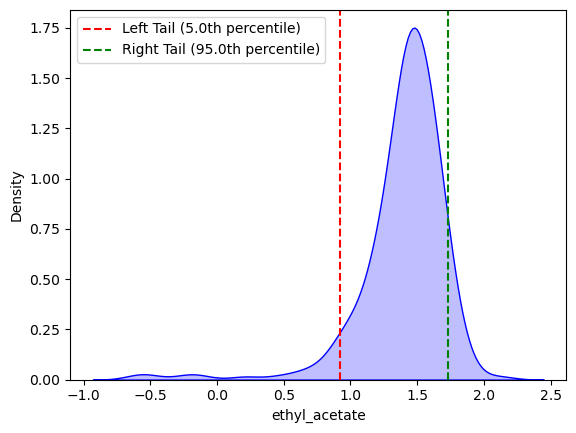

In [12]:
plot_density_with_tails(df, 'ethyl_acetate')